### Import libraries

In [1]:
import glob
import pandas as pd
import numpy as np

from sklearn.metrics import roc_auc_score, mean_squared_error, root_mean_squared_error, cohen_kappa_score, roc_curve

from scipy.stats import spearmanr

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = ['Helvetica'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 14

### Read the files

In [2]:
df = pd.read_parquet('./t_manual_annotation.parquet')

### Kappa score between annotators

In [3]:
# filter the ones from round 2, and which were separately annotated by each annotator
FILTER = (df['annotation round']==2) & (df['annotator']=='1&2')

# compute Cohen's Kappa
cohen_kappa_score(df[FILTER]['annotator 1'],df[FILTER]['annotator 2'])

0.8192771084337349

### Assess model performances

#### Toxic-BERT

In [4]:
roc_auc_score(df['decision'], df['Max toxic-BERT'])

0.8399092268812214

#### Perspective API

2 out of 350 posts were not generated by Perspective API, returning the following errors:
- "Attribute PROFANITY does not support request languages: mt"
- "Attribute PROFANITY does not support request languages: sk"

In [5]:
roc_auc_score(df.dropna(subset=['Max Perspective API'])['decision'], df.dropna(subset=['Max Perspective API'])['Max Perspective API'])

0.870325630252101

### OpenAI omni-moderation

In [9]:
fpr, tpr, thresholds = roc_curve(df['decision'], df['Max omni-moderation'])
score = roc_auc_score(df['decision'], df['Max omni-moderation'])
score

0.9114188457372737

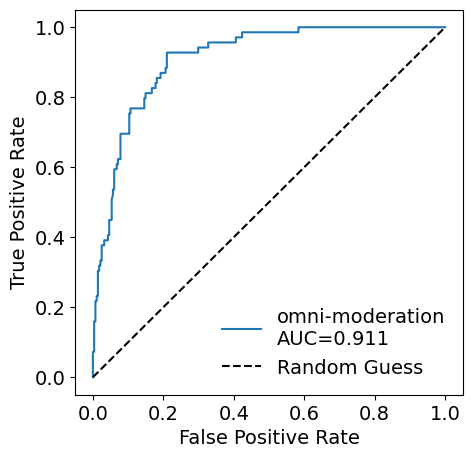

In [13]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label=f'omni-moderation\nAUC={round(score,3)}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(frameon=False)
plt.savefig('../../figures/model_validations/omni_moderation.pdf')
plt.show()